In [ ]:
import pandas as pd

in_dir = './Datos - Hackathon JusticIA/'
in_file = 'JusticIA_DatosTranscripciones.csv'

df = pd.read_csv(in_dir+in_file)
df.head(32)

,Fuente,Conjunto,NombreArchivo,Texto,MetodoTexto
0,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Adame_Flores_samuel_I...,ADAME FLORE Samuél.- Exp-100-10-1-67.\nCOMUNIS...,manual
1,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Adame_Flores_samuel_I...,ADAME FLORES Samuél. Exp-100-10-16-2-71.\nH-25...,manual
2,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Baltazar_Arreola_Vict...,"GUEL ALEMAN, EMILIO AZCARRAGA ulotro personaje...",manual
3,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Gallardo_Moreno_Juan_...,"GALLARDO MORENO, Juan.- Exp.11-169-67.\n9- H-2...",manual
4,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Gallardo_Moreno_Juan_...,"BIGOTES, El. Exp.100-10-16-4-72\nH-195 L-2\n10...",manual
5,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Gallardo_Moreno_Juan_...,"GALLARDO MORENO, Juan .- Exp-100-28-28-74.\n-3...",manual
6,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Garay_Gonzalez_Genaro...,"GARAY GONZALEZ, Génaro Francisco. -Exp. 80-9-7...",manual
7,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Hernandez_Rivera_Juan...,HERNANDEZ RIVERA Juan. Exp-100-10-16-2-71\nH-3...,manual
8,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Lopez_Ayala_Raul_IMG_...,recordar el número y siguiente la idea de -\nF...,manual
9,Fichas Archivos de la Represión,Fichas_manual,Ficheros_ACNR_militantes_Lopez_Ayala_Raul_IMG_...,"LOPEZ AYALA, Raúl.- Exp.-11-169-74\nH-254 L-42...",manual


In [ ]:
manual = df[df['MetodoTexto'] == 'manual'] # Get just manual text
manual = manual[['NombreArchivo', 'Texto']] # Get just two columns

In [ ]:
manual.values.shape

(1000, 2)

In [ ]:
manual.values[:, 0].shape

(1000,)

In [ ]:
manual.Texto.str.len().max()

2133

In [ ]:
text = manual.Texto.str.cat(sep=' ')
vocab = sorted(set(text))
#vocab, print(f'{len(vocab)} unique characters')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
import numpy as np
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2021-08-20 22:40:58.283162: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-20 22:40:59.091993: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-20 22:40:59.137817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-20 22:40:59.140742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.807GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2021-08-20 22:40:59.140831: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-20 22:40:59.152029: I tensorflow/stream_executor/

In [ ]:
ids_from_chars = preprocessing.StringLookup(
    vocabulary=list(vocab), mask_token=None)
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)


2021-08-20 22:40:59.172972: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-20 22:40:59.173386: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-20 22:40:59.173824: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.807GHz coreCount: 28 deviceMemorySize: 11.77GiB deviceMemoryBandwidth: 335.32GiB/s
2021-08-20 22:40:59.173874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative va

In [ ]:
raw_ds = tf.data.Dataset.from_tensor_slices((manual.values[:, 0], manual.values[:, 1]))

In [ ]:
manual_dir = './Datos - Hackathon JusticIA/Fichas_manual/'

def get_path(file_name, text):
    return manual_dir + file_name, text

path_ds = raw_ds.map(get_path)

In [ ]:
def convert(file_path, text):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [512, 512])
    chars = tf.strings.unicode_split(text, 'UTF-8')
    ids = ids_from_chars(chars)
    return img, ids[:256]

train_batches = path_ds.shuffle(1000).map(convert).apply(tf.data.experimental.ignore_errors()).padded_batch(8, 
                                                                                        padded_shapes=([512, 512, 3], [256]),
                                                                                        drop_remainder=True)
test_batch = next(iter(train_batches))
test_batch[0].shape, test_batch[1].shape

2021-08-20 22:40:59.646952: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-20 22:40:59.666569: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3912000000 Hz


(TensorShape([8, 512, 512, 3]), TensorShape([8, 256]))

In [ ]:
import matplotlib.pyplot as plt

tf.Tensor(
[ 53  46  41  54  37  50  51  41  36  33  36   2  33  53  52  47  46  47
  45  33   2  36  37   2  37  84  76  15  19  18  18  15  19  18  15  19
  15  25  22  16   1  39  53  37  50  50  37  50  47  16   2  19  26   2
   2   2  40  15  19  27  27   2  44  15  22  25   1  33  72   2  78  65
  79  76   2  63  80  75  14   2  79  65   2  79  61  62  65   2  77  81
  65   2  79  65  65  66  65  63  80  81  61  78 102  74   2  73 104  80
  69  74  65  79   2  85   2  73  61  74 104  66  65  79   1  80  61  63
  69  75  74  79   2  65  74   2  72  75  79   2  77  81  65   2  79  65
   2  63  75  74  64  65  78 102   2  65  74 103  78  67  69  63  61  73
  65  74  80  65   2  72  61   2  82  69  75  72  61   1  63  69 106  74
   2  61   2  65  79  80  61   2  41  74  79  80  16  85   2  77  81  65
  76  61  78  61   2  80  61  72   2  65  66  65  63  80  75  14   2  79
  65  68  61   2  78  65  63  69  62  69  64  75   2  65  72   1  81  80
  16   2   2  64  65   2  45 103  84  16

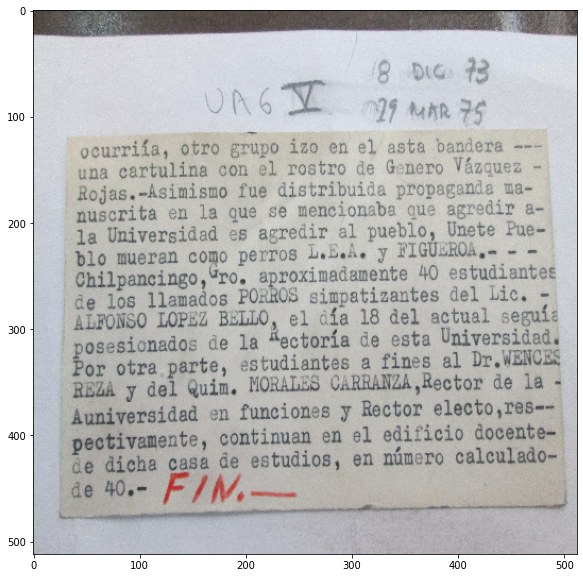

In [ ]:
for i, j in train_batches.take(1):
    i = tf.cast(i, tf.uint8)
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(i[0])
    print(j[0])

In [ ]:
#chars_from_ids(j[0])

In [27]:
test_batch = next(iter(train_batches))
test_batch[0].shape, test_batch[1].shape

(TensorShape([8, 512, 512, 3]), TensorShape([8, 256]))

In [32]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, emb_dim, num_heads=2, mlp_dim=512, rate=0.0, eps=1e-6):
        super(TransformerBlock, self).__init__()
        self.attn = MultiHeadAttention(emb_dim, num_heads)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'), 
            layers.Dense(emb_dim),
        ])
        self.norm1 = layers.LayerNormalization(epsilon=eps)
        self.norm2 = layers.LayerNormalization(epsilon=eps)
        self.drop1 = layers.Dropout(rate)
        self.drop2 = layers.Dropout(rate)

    def call(self, inputs, training):
        x_norm1 = self.norm1(inputs)
        attn_output = self.attn(x_norm1, x_norm1, x_norm1)
        attn_output = inputs + self.drop1(attn_output, training=training) 
        
        x_norm2 = self.norm2(attn_output)
        mlp_output = self.mlp(x_norm2)
        return attn_output + self.drop2(mlp_output, training=training)
    
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, n_patches, emb_dim):
        super(PositionalEmbedding, self).__init__()
        self.n_patches = n_patches
        self.position_embedding = layers.Embedding(
            input_dim=n_patches, output_dim=emb_dim
        )

    def call(self, patches):
        positions = tf.range(start=0, limit=self.n_patches, delta=1)
        return patches + self.position_embedding(positions)
    
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)

        self.dense = layers.Dense(d_model)

    def split_into_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  
        k = self.wk(k)  
        v = self.wv(v)  

        q = self.split_into_heads(q, batch_size)  
        k = self.split_into_heads(k, batch_size)  
        v = self.split_into_heads(v, batch_size)  

        scaled_attention = scaled_dot_product(q, k, v)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3]) 
        original_size_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model)) 

        output = self.dense(original_size_attention) 
        return output

In [40]:
def scaled_dot_product(q, k, v):
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_qk = tf.matmul(q, k, transpose_b=True) / tf.math.sqrt(dk)
    attn_weights = tf.nn.softmax(scaled_qk, axis=-1)  
    output = tf.matmul(attn_weights, v) 
    return output

In [142]:
class TransCNN(tf.keras.models.Model):
    def __init__(self, d_model=[32, 64, 64], kernel=[4, 4, 4, 4], 
                 target_vocab_size=200, maximum_position_encoding=5000):
        super(TransCNN, self).__init__()
        d_model = 128
        self.conv_1 = tf.keras.Sequential([
            layers.experimental.preprocessing.Rescaling(1./255),
            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
            layers.experimental.preprocessing.RandomRotation(0.3),
            layers.experimental.preprocessing.RandomZoom(0.1),
            layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),

            layers.Conv2D(32, kernel_size=9, 
                          strides=1, padding='same'),
            layers.Conv2D(32, kernel_size=5, 
                          strides=1, padding='same'),
            layers.Conv2D(d_model, kernel_size=32, 
                          strides=32, padding='same')
        ])
        self.pos_emb_1 = PositionalEmbedding(256, d_model)
        self.block_1 = TransformerBlock(d_model, 2, 512)

    
    def call(self, inp, training=False):
        x = self.conv_1(inp)
        B, H, W, C = x.shape
        #print('Patch shape:', x.shape)
        x = tf.reshape(x, [B, H*W, C])
        #print('Patch shape:', x.shape)
        x = self.pos_emb_1(x)

        x = self.block_1(x)

        return x
    
model = TransCNN(target_vocab_size=200, maximum_position_encoding=5000)

temp_input = tf.random.uniform((8, 512, 512, 3), dtype=tf.int64, minval=0, maxval=200)

predictions = model(temp_input, training=False)

predictions  

<tf.Tensor: shape=(8, 256, 128), dtype=float32, numpy=
array([[[-1.0062492 ,  1.8074597 ,  0.28290504, ..., -0.02387123,
          0.3283768 ,  0.6261131 ],
        [-1.0343198 ,  1.7229143 ,  0.3362666 , ..., -0.18141922,
          0.25993076,  0.645207  ],
        [-0.92458254,  1.7477171 ,  0.46989876, ..., -0.08783302,
          0.4130537 ,  0.8764436 ],
        ...,
        [-1.0215073 ,  1.7854171 ,  0.4283959 , ..., -0.10677928,
          0.26288378,  0.79639274],
        [-1.036042  ,  1.7027199 ,  0.41315526, ..., -0.39934066,
          0.32004517,  0.79662263],
        [-0.99125177,  1.8982004 ,  0.50610286, ..., -0.0450904 ,
          0.32746926,  0.75691223]],

       [[-1.0973965 ,  1.7167355 ,  0.33475745, ..., -0.06019634,
          0.05437361,  0.68769765],
        [-1.0831208 ,  1.6527013 ,  0.34439737, ..., -0.18591997,
          0.21147741,  0.87199605],
        [-0.98696923,  1.5933809 ,  0.17554408, ..., -0.21995884,
          0.16473687,  0.82666975],
        ...,

In [144]:
model.summary()

Model: "trans_cnn_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_59 (Sequential)   (8, 16, 16, 128)          4227872   
_________________________________________________________________
positional_embedding_26 (Pos multiple                  32768     
_________________________________________________________________
transformer_block_25 (Transf multiple                  198272    
Total params: 4,458,912
Trainable params: 4,458,912
Non-trainable params: 0
_________________________________________________________________


In [145]:
optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)


In [149]:
loss_function(test_batch[1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=5.3080783>

In [146]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


In [147]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)


In [148]:
test_batch[1].shape, predictions.shape

(TensorShape([8, 256]), TensorShape([8, 256, 128]))

In [218]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)


In [150]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [151]:
EPOCHS = 20

In [152]:
@tf.function
def train_step(inp, tar):

    with tf.GradientTape() as tape:
        predictions = model(inp, training = True)
        loss = loss_function(tar, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(accuracy_function(tar, predictions))
    
    
train_step(test_batch[0], test_batch[1])

In [154]:
import time

In [155]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(model=model,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored!!')


In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    # inp -> portuguese, tar -> english
    for (batch, (inp, tar)) in enumerate(train_batches):
        train_step(inp, tar)

        if batch % 50 == 0:
            print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    if (epoch + 1) % 5 == 0:
        #ckpt_save_path = ckpt_manager.save()
        print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

    print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')


Epoch 1 Batch 0 Loss 8.6994 Accuracy 0.1416
Epoch 1 Batch 50 Loss 5.2183 Accuracy 0.0887
Epoch 1 Batch 100 Loss 4.4295 Accuracy 0.1127
Epoch 1 Loss 4.2806 Accuracy 0.1162
Time taken for 1 epoch: 54.64 secs

Epoch 2 Batch 0 Loss 3.6501 Accuracy 0.1316
Epoch 2 Batch 50 Loss 3.6130 Accuracy 0.1379
Epoch 2 Batch 100 Loss 3.6225 Accuracy 0.1359
Epoch 2 Loss 3.6286 Accuracy 0.1359
Time taken for 1 epoch: 55.08 secs

Epoch 3 Batch 0 Loss 3.6126 Accuracy 0.1349


In [227]:
predictions = model(test_batch)
predicted_id = tf.argmax(predictions, axis=-1)
chars_from_ids(predicted_id)

<tf.Tensor: shape=(8, 256), dtype=string, numpy=
array([[b'e', b'A', b' ', ..., b's', b' ', b'c'],
       [b' ', b' ', b'I', ..., b't', b'e', b' '],
       [b'R', b' ', b' ', ..., b',', b'-', b'-'],
       ...,
       [b'E', b' ', b'A', ..., b'o', b'm', b'o'],
       [b'R', b'E', b'R', ..., b'e', b'e', b's'],
       [b'a', b'E', b'R', ..., b'n', b' ', b't']], dtype=object)>

In [228]:
chars_from_ids(test_batch[1][0])

<tf.Tensor: shape=(256,), dtype=string, numpy=
array([b'S', b'A', b'L', b'A', b'S', b' ', b'O', b'B', b'R', b'E', b'G',
       b'O', b'N', b',', b' ', b'I', b'g', b'n', b'a', b'c', b'i', b'o',
       b' ', b'A', b'r', b't', b'u', b'r', b'o', b'.', b' ', b'E', b'x',
       b'p', b'.', b' ', b'1', b'1', b'-', b'2', b'3', b'5', b'-', b'7',
       b'4', b'.', b'\n', b'(', b'6', b'8', b')', b' ', b'H', b'-', b'3',
       b'0', b'9', b' ', b'L', b'-', b'1', b'1', b'.', b'\n', b't', b'e',
       b'm', b'e', b'n', b't', b'e', b' ', b'd', b'e', b' ', b'q', b'u',
       b'e', b' ', b'n', b'o', b' ', b'c', b'o', b'n', b't', b'a', b'b',
       b'a', b'n', b' ', b'c', b'o', b'n', b' ', b'l', b'a', b's', b' ',
       b'c', b'a', b's', b'a', b's', b' ', b'd', b'e', b' ', b's', b'e',
       b'g', b'u', b'r', b'i', b'-', b'\n', b'd', b'a', b'd', b' ', b'n',
       b'e', b'c', b'e', b's', b'a', b'r', b'i', b'a', b's', b' ', b'p',
       b'\xc3\xa1', b'r', b'a', b' ', b'e', b's', b'o', b's', b' ', b'a',


In [201]:
chars_from_ids(predicted_id[0])

<tf.Tensor: shape=(256,), dtype=string, numpy=
array([b'G', b'U', b'E', b'L', b' ', b'A', b'L', b'E', b'M', b'A', b'N',
       b',', b' ', b'E', b'M', b'I', b'L', b'I', b'O', b' ', b'A', b'Z',
       b'C', b'A', b'R', b'R', b'A', b'G', b'A', b' ', b'u', b'l', b'o',
       b't', b'r', b'o', b' ', b'p', b'e', b'r', b's', b'o', b'n', b'a',
       b'j', b'e', b'.', b'\n', b'E', b'x', b'p', b'.', b'1', b'0', b'0',
       b'-', b'1', b'0', b'-', b'1', b'6', b'-', b'2', b'\n', b'H', b'-',
       b'2', b'0', b'0', b' ', b'L', b'-', b'6', b'.', b'\n', b'1', b'1',
       b'-', b'A', b'b', b'r', b'i', b'l', b'-', b'7', b'2', b'.', b' ',
       b'-', b'E', b'n', b' ', b'u', b'n', b' ', b'r', b'e', b'c', b'a',
       b'd', b'o', b' ', b'e', b'n', b'v', b'i', b'a', b'd', b'o', b' ',
       b'p', b'o', b'r', b' ', b'H', b'I', b'L', b'A', b'R', b'I', b'O',
       b' ', b'A', b'D', b'A', b'M', b'E', b'\n', b'H', b'E', b'R', b'N',
       b'A', b'N', b'D', b'E', b'Z', b' ', b'h', b'i', b'j', b'o', b' ',
